In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from data.mnist_loader import load_mnist_batches, extract_mnist, get_augmentation_transform
from models.single_trainable import Trainable

# MNIST

In [10]:
dataset = extract_mnist(get_augmentation_transform(img_size=(512, 512)))

In [11]:
print(dataset.num_train_samples)
print(dataset.num_test_samples)

60000
10000


In [12]:
dataset.training_set[0]

(tensor([[[-0.3733, -0.3733, -0.3733,  ..., -0.3733, -0.3733, -0.3733],
          [-0.3733, -0.3733, -0.3733,  ..., -0.3733, -0.3733, -0.3733],
          [-0.3733, -0.3733, -0.3733,  ..., -0.3733, -0.3733, -0.3733],
          ...,
          [-0.3733, -0.3733, -0.3733,  ..., -0.3733, -0.3733, -0.3733],
          [-0.3733, -0.3733, -0.3733,  ..., -0.3733, -0.3733, -0.3733],
          [-0.3733, -0.3733, -0.3733,  ..., -0.3733, -0.3733, -0.3733]]]),
 5)

In [13]:
instance = dataset.training_set[0]
plt.imshow(instance[0][0])

In [14]:
batches_mnist_dataset = load_mnist_batches()

In [15]:
print(batches_mnist_dataset.batch_size)
print()
print(batches_mnist_dataset.num_train_samples)
print(batches_mnist_dataset.num_train_batches)
print()
print(batches_mnist_dataset.num_val_samples)
print(batches_mnist_dataset.num_val_batches)
print()
print(batches_mnist_dataset.num_test_samples)
print(batches_mnist_dataset.num_test_batches)

128

51000
399

9000
71

10000
79


Images shape: torch.Size([128, 1, 28, 28]), Labels shape: torch.Size([128])
Images dtype: torch.float32, Labels dtype: torch.int64


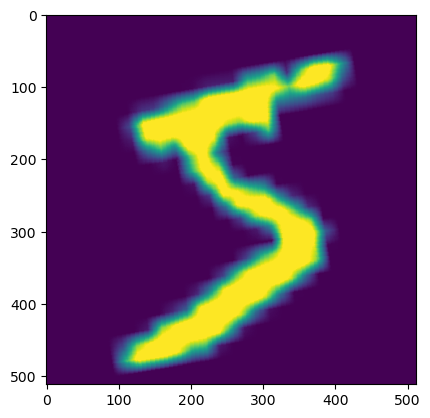

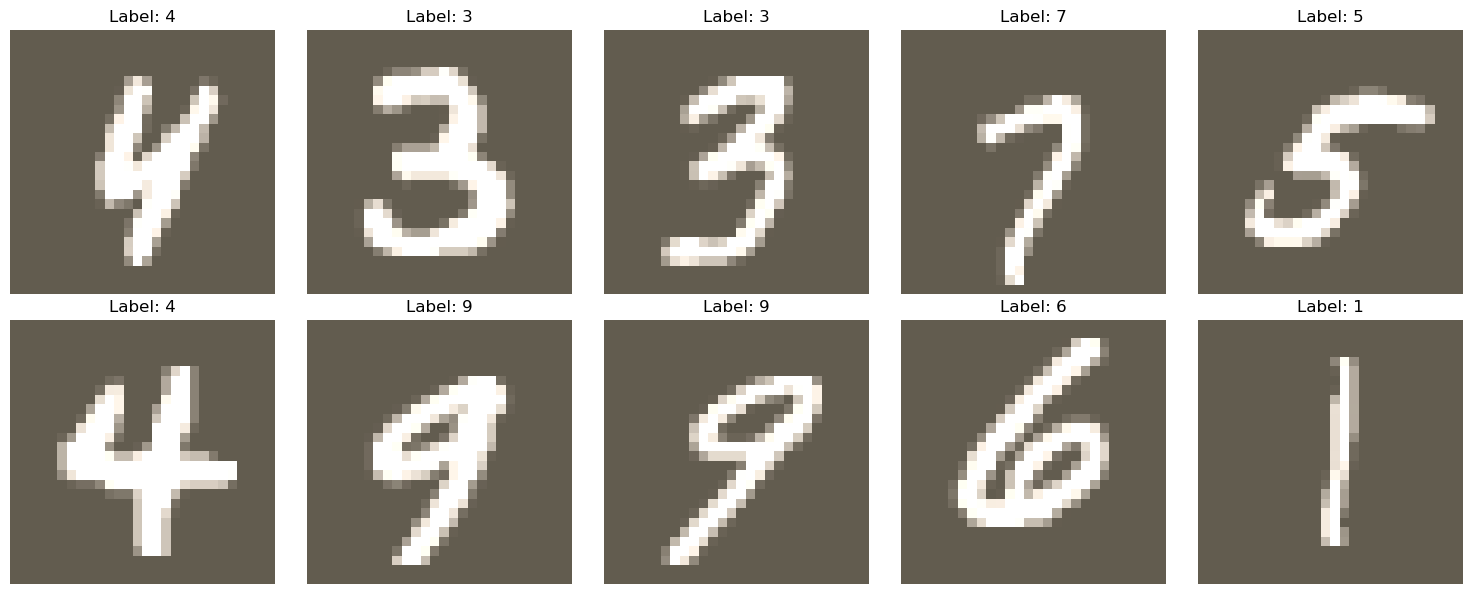

In [16]:
print(batches_mnist_dataset)

for images, labels in batches_mnist_dataset.train_loader:
    print(f'Images shape: {images.shape}, Labels shape: {labels.shape}')
    print(f'Images dtype: {images.dtype}, Labels dtype: {labels.dtype}')
    # Get the first 10 images and labels from your batch
    images_batch, labels_batch = images[:10], labels[:10]

    # Move images and labels to CPU and convert to NumPy arrays
    images_np = images_batch.cpu().numpy()
    labels_np = labels_batch.cpu().numpy()

    # Denormalize images if necessary
    # If you have normalized your images during preprocessing, you need to reverse that here.
    # Replace 'mean' and 'std' with the values you used during normalization.

    # Example normalization values (common for ImageNet models)
    # If you didn't normalize your images, you can skip the denormalization step.

    mean = np.array([0.485, 0.456, 0.406])  # Example values; replace with yours if different
    std = np.array([0.229, 0.224, 0.225])   # Example values; replace with yours if different

    # Denormalize the images
    images_np = images_np * std[None, :, None, None] + mean[None, :, None, None]
    images_np = np.clip(images_np, 0, 1)  # Ensure pixel values are within [0, 1]

    # Set up the plot
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()

    for idx, ax in enumerate(axes):
        img = images_np[idx]
        label = labels_np[idx]

        # Transpose the image to (H, W, C) format for plotting
        img = np.transpose(img, (1, 2, 0))

        ax.imshow(img)
        ax.set_title(f'Label: {label}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()
    break  # Only need to check one batch